In [768]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [769]:
x_data=Variable(torch.tensor([[1.0],[2.0],[3.0],[4.0]]))  # this makes is 3*1,  only one feature, require grad default to false
y_data=Variable(torch.tensor([[-1.0],[-1.0],[1.0],[1.0]]))   #Variable:Wraps a tensor and records the operations applied to it
epochs=500

In [770]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()   #call in the init of the nn.Module
        self.fc1=torch.nn.Linear(1,1)  #one feature in, one feature out 1*1
        #self.relu1=torch.nn.ReLU()
        #self.tanh1 = torch.nn.Tanh()
        
        
    def forward(self,x):  
        
        #y_pred=F.sigmoid(self.fc1(x))
        #t=self.tanh1(self.fc1(x))
        t=self.fc1(x)
        t=F.tanh(t)     #in order to use tanh since it keep the out put between -1 and 1, need to modify ytarget to -1 and 1
                        # also the binary BCF loss would not work for -1 and 1 (need 0,1 ) so had to change loss function to
                        # torch.nn.SoftMarginLoss target tensor y (containing 1 or -1)
        #t=torch.nn.Tanh(t)
        #t=self.relu1(t)
        #t=F.softmax(t,dim=0)
        #y_pred=self.soft1(t)
        y_pred=t
        
        return y_pred
        

In [771]:
model=Model()

In [772]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [773]:
for parameter in model.parameters(): print((parameter[0]))   #initillizing it on its own

tensor([-0.5718])
tensor(0.9330)


In [774]:
list((model.parameters()))

[Parameter containing:
 tensor([[-0.5718]]), Parameter containing:
 tensor([ 0.9330])]

In [775]:
#criterion=torch.nn.BCELoss(size_average=True)   #loss initilization, binary cross entropy need to be 0,1 y
#criterion=torch.nn.HingeEmbeddingLoss(margin=0.0)  #soso
criterion=torch.nn.SoftMarginLoss()
#criterion=torch.nn.CrossEntropyLoss()
#criterion=torch.nn.NLLLoss()
#optimizer=torch.optim.SGD(model.parameters(),lr=0.01)  #init SGD with initilized model.paramter  (w/ grad, weight and bias)
#optimizer=torch.optim.Adam(model.parameters(),lr=0.1)
#optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

#torch.optim will hold the current state and will update the parameters based on the computed gradients. iterable containing the parameters (Variable)

In [776]:
loss_=torch.tensor([])
for epoch in range(epochs):
    
    #for parameter in model.parameters(): print('epoch',epoch,parameter[0]) 
    y_pred=model(x_data)   #this automtically call forward
    loss=criterion(y_pred,y_data)
    
    
    tmp=torch.tensor([loss])
    loss_=torch.cat((loss_,tmp))
    optimizer.zero_grad()   #initilize gradient to zero before every step, to avoid accumulation ,zero off good for RNN
    loss.backward()         #calculate gradient
    optimizer.step()        #update parameter (weights)
    t0=torch.tensor([1.0])
    t1=torch.tensor([4.0])
    t2=torch.tensor([7.0])
    output0=model.forward(t0)
    output1=model.forward(t1)
    output2=model.forward(t2)
    #_, predicted0=torch.max(output0.data, 1)
    #_, predicted1=torch.max(output1.data, 1)
    #_, predicted2=torch.max(output2.data, 1)
    if(epoch%5==0): print('epoch:',epoch,'loss:',loss,'1.0',output0,'4.0',output1,'7.0',output2)
    
    


epoch: 0 loss: tensor(0.9430) 1.0 tensor([ 0.3466]) 4.0 tensor([-0.8675]) 7.0 tensor([-0.9951])
epoch: 5 loss: tensor(0.9283) 1.0 tensor([ 0.3779]) 4.0 tensor([-0.7811]) 7.0 tensor([-0.9865])
epoch: 10 loss: tensor(0.8731) 1.0 tensor([ 0.5084]) 4.0 tensor([-0.3318]) 7.0 tensor([-0.8483])
epoch: 15 loss: tensor(0.7702) 1.0 tensor([ 0.6420]) 4.0 tensor([ 0.4443]) 7.0 tensor([ 0.1911])
epoch: 20 loss: tensor(0.7522) 1.0 tensor([ 0.6641]) 4.0 tensor([ 0.6264]) 7.0 tensor([ 0.5854])
epoch: 25 loss: tensor(0.7458) 1.0 tensor([ 0.6578]) 4.0 tensor([ 0.6761]) 7.0 tensor([ 0.6936])
epoch: 30 loss: tensor(0.7404) 1.0 tensor([ 0.6409]) 4.0 tensor([ 0.6906]) 7.0 tensor([ 0.7345])
epoch: 35 loss: tensor(0.7349) 1.0 tensor([ 0.6178]) 4.0 tensor([ 0.6911]) 7.0 tensor([ 0.7526])
epoch: 40 loss: tensor(0.7289) 1.0 tensor([ 0.5903]) 4.0 tensor([ 0.6853]) 7.0 tensor([ 0.7615])
epoch: 45 loss: tensor(0.7224) 1.0 tensor([ 0.5592]) 4.0 tensor([ 0.6765]) 7.0 tensor([ 0.7672])
epoch: 50 loss: tensor(0.7154) 1

In [777]:
for i,parameter in enumerate(model.parameters()):
    #print('w:',list(model.parameters()[0]),'bias:',list(model.parameters()[0])) 

    print(parameter[0])    
    

tensor([ 1.1394])
tensor(-2.7079)


In [778]:
loss_softmax_tan=loss_

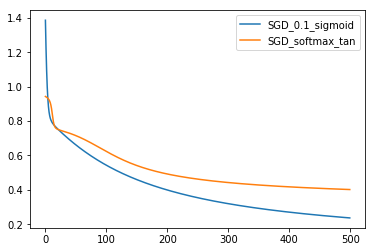

In [779]:

plt.plot(np.arange(0,epochs,1),loss_SGD_01.detach().numpy(),label='SGD_0.1_sigmoid')  #lr=0.01 #need to detach gradient for graph breakdown otherwise won't do numpy in the middle of graph (good for end of run)
plt.plot(np.arange(0,epochs,1),loss_softmax_tan.detach().numpy(),label='SGD_softmax_tan') 
#plt.plot(np.arange(0,epochs,1),loss_sgd_mom.detach().numpy(),label='SGD_0.01_mom_0.9')   #lr=0.01 momentum=0.9
#plt.plot(np.arange(0,epochs,1),loss_Adam.detach().numpy(),label='Adam_0.1') #lr=0.1
#plt.xlim([-1,40])
plt.legend()
plt.show() 


#SGD w/o momentum look better in converging, than with momentum

In [732]:
test=torch.tensor([4.0])
model.forward(test).data[0]

tensor(0.6775)